## 인공신경망


In [20]:
import pandas as pd          
from sklearn import model_selection
from sklearn import metrics
import tensorflow as tf
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np 


## 타이타닉 데이터

In [21]:

#타이타닉 데이터 준비 
file_path= 'titanic.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 데이터 전처리
## 불필요 컬럼 삭제

In [22]:

del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Cabin']

#결측치 처리 (x)
df.dropna(thresh=int(len(df) * 0.5), axis=1) #결측치 제거
df['Embarked'] = df['Embarked'].fillna('S') # 최다빈도 ‘S’로 대체
df['Age']=df['Age'].fillna(df['Age'].mean()) # 나이 평균값으로 대체


df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


## 범주형 컬럼 처리

In [23]:

df['Sex']=df['Sex'].astype('category') 
df['Pclass']=df['Pclass'].astype('category') 
df['Embarked']=df['Embarked'].astype('category')
df = pd.get_dummies(df) #원 핫 인코딩 0과 1로 나눠준다. #사이킷런 그냥 써도 무방하다. true=1, false=0 
#전부다 숫자로 바꾸어주어야 하는 tensorflow
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


## 독립변수와 종속변수 구분 (x, y)

In [24]:

x_data=df.iloc[:,1:] #행 번호 data 중에서 전부다 
y_data=df.iloc[:,0] #y dats는 첫번째 컬럼만 집어넣어준다. y-data는 target data labeling data
x_data = x_data.values #x-data값만 집어넣어주었다.
y_data = y_data.values 
print(x_data)
print(y_data) # y-data 는 0과 1로 되어있다 


[[22.          1.          0.         ...  0.          0.
   1.        ]
 [38.          1.          0.         ...  1.          0.
   0.        ]
 [26.          0.          0.         ...  0.          0.
   1.        ]
 ...
 [29.69911765  1.          2.         ...  0.          0.
   1.        ]
 [26.          0.          0.         ...  1.          0.
   0.        ]
 [32.          0.          0.         ...  0.          1.
   0.        ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 

## 머신러닝 
## 데이터분할(7:3)

In [25]:
import numpy as np

#70퍼 train data 30퍼 new data model selection x_data y_data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)
print(type(x_train))

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)
print((x_train))
#준비완료 

<class 'numpy.ndarray'>
[[60.          1.          1.         ...  1.          0.
   0.        ]
 [57.          0.          0.         ...  0.          1.
   0.        ]
 [21.          0.          0.         ...  0.          0.
   1.        ]
 ...
 [49.          1.          0.         ...  1.          0.
   0.        ]
 [29.69911765  0.          0.         ...  1.          0.
   0.        ]
 [34.          0.          0.         ...  0.          0.
   1.        ]]


## 모델 적용

In [26]:
import tensorflow as tf


model = tf.keras.models.Sequential()
#model 이름 정의 keras model sequential model.add
                                                                          #hidden layer() 안에 있는 숫자들은 node 첫번째 layer 32 
model.add(tf.keras.layers.Dense(32, activation='relu',input_shape=(12,))) #쉼표 뒤는 몇개가 와도 상관이 없다 독립변수 12 32개의 노드 통과 

#model.add(tf.keras.layers.Dropout(0.1)) #weight 계산해야 하는 값들이 너무 많아진다. 과적합이 된다. 정확하게 찾는지는 살았는지 죽었는지 
#변수를 바꿔가면서 할 수 있다. 만들면 만들수록 과적합이 된다. 100프로 다 찾을 떄까지 가상의 곡선을 그려 할 수 있겠지만 new data가 되면 확률이 떨어진다. 
#overweight값 일부를 빼준다. 덜 Flexible 
model.add(tf.keras.layers.Dense(128, activation='relu')) #relu함수는 0보다 큰 값은 직선을 만든다 노드의 수는 128개 하이퍼 파라미터
#데이터의 성격이 좋을 수도 있고 나쁠 수도 있다.-------------128같은 값을 숫자를 줄이고 늘리면서 정확도를 확인한다. 
#hidden layer를 더 늘려가는 방법도 좋다. 
#model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(4, activation='relu'))#activation 함수는 relu를 썼고 
#model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #data 성격에 따라서 바꿔주어야 할 것 input 12개 output 1개 datashape!!! 
#숫자를 적게 하고 여러개 만든것(hidden layer를 많게 하는 것이 더 정확하더라..) #최종은 sigmoid 함수 사용: 분류가 더 정확해진다. 


model.compile(loss='binary_crossentropy', #compile - loss 함수 목적함수 줄이기 위한 방법 mean square error y-f(x)^2을 다 더한 것
              #연속된 값을 잡기 위함. 둘 중에 값을 찾을 떄는 cross entropy 0과 1을 찾을 떄 유리하다. #regression 연속된 값을 추론할 때 
              #둘중에 하나를 찾을 때 binary croos entropy
              optimizer = 'adam', # optimizer 어느 방향으로 가는 것이 weight 1/2 50 1/3 30으로 가는 것이 weight가 더 빨리 찾는지를 알아본다.
              metrics = ['binary_accuracy'], #metric binary accuracy 둘 중에 하나 정확함을 찾는다 
              )

#hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30, batch_size = 32, verbose = 2)
hist = model.fit(x_train, y_train, epochs = 100, batch_size = 32, verbose = 2) #891번 다 돌아서 loss가 최소가 되는 optimizer 1 epoch. 100번 돌려라
#batch size 몇 개 32개씩 해라. verbose flag가 0번 1번 2번 2번 binary accuracy를 나타내기. 입력 출력 바꿔주고 숫자 바꿔주고 
#데이터 인공신경망이지만 앞에 data를 잘 처리해주는 것이 매우 중요하지만 . 결측치 처리 

Epoch 1/100
20/20 - 3s - loss: 1.1312 - binary_accuracy: 0.4719 - 3s/epoch - 156ms/step
Epoch 2/100
20/20 - 0s - loss: 0.6385 - binary_accuracy: 0.6404 - 60ms/epoch - 3ms/step
Epoch 3/100
20/20 - 0s - loss: 0.6187 - binary_accuracy: 0.6549 - 56ms/epoch - 3ms/step
Epoch 4/100
20/20 - 0s - loss: 0.6140 - binary_accuracy: 0.6613 - 48ms/epoch - 2ms/step
Epoch 5/100
20/20 - 0s - loss: 0.6027 - binary_accuracy: 0.6838 - 52ms/epoch - 3ms/step
Epoch 6/100
20/20 - 0s - loss: 0.5953 - binary_accuracy: 0.6918 - 63ms/epoch - 3ms/step
Epoch 7/100
20/20 - 0s - loss: 0.5885 - binary_accuracy: 0.7047 - 70ms/epoch - 3ms/step
Epoch 8/100
20/20 - 0s - loss: 0.5806 - binary_accuracy: 0.7047 - 62ms/epoch - 3ms/step
Epoch 9/100
20/20 - 0s - loss: 0.5998 - binary_accuracy: 0.7014 - 53ms/epoch - 3ms/step
Epoch 10/100
20/20 - 0s - loss: 0.5855 - binary_accuracy: 0.6934 - 52ms/epoch - 3ms/step
Epoch 11/100
20/20 - 0s - loss: 0.5682 - binary_accuracy: 0.7223 - 55ms/epoch - 3ms/step
Epoch 12/100
20/20 - 0s - loss

In [27]:

y_predict = model.predict(x_train)
#predict 0과 1 
#y_predict 
y_predict = np.where(y_predict > 0.5, 1, 0)


type(y_predict[0])

score = metrics.accuracy_score(y_train, y_predict) #classification
#train score test score를 
print('train score: ', score)

# test 평가 
y_predict = model.predict(x_test)
y_predict = np.where(y_predict > 0.5, 1, 0)

score = metrics.accuracy_score(y_test, y_predict)
print('test score: ', score)

print(confusion_matrix(y_test, y_predict)) #몇 개중에 몇개를 맞추고 틀렸는지 확인. 
print(classification_report(y_test, y_predict))
#accuracy 0.74 

20/20 [==============================] - 0s 3ms/step
train score:  0.8475120385232745
9/9 [==============================] - 0s 5ms/step
test score:  0.7350746268656716
[[132  38]
 [ 33  65]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       170
         1.0       0.63      0.66      0.65        98

    accuracy                           0.74       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.74      0.74      0.74       268



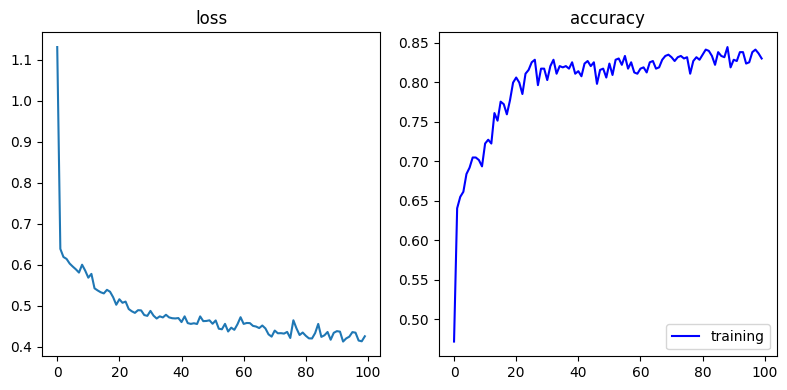

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['binary_accuracy'], 'b-', label="training")
#plt.plot(model.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()
#첫번째 epoch가 뚝 떨어지고 100번째 epoch가 정확해짐을 알 수 있다. 100번째의 정확도 확실히 높아진다. 

## iris 데이터

In [29]:
import seaborn as sns
import pandas as pd
import tensorflow as tf

iris = sns.load_dataset('iris')
iris = pd.get_dummies(iris) #원 핫 인코딩  species setosa (true(1), setosa(false(0))/ versicolor(true(1))/(false(0))


In [31]:
x_data=iris.iloc[:,0:4]
y_data=iris.iloc[:,4:7]
x_data = x_data.values
y_data = y_data.values
print(x_data)



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [32]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

x_train = x_train.astype(float)
y_train = y_train.astype(float)

print(y_test[0])

x_test = x_test.astype(float)
y_test = y_test.astype(float)

y_test[0]

#로지스틱 모델링 


[1 0 0]


array([1., 0., 0.])

In [35]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(16, activation='relu',input_shape=(4,))) #input data column 4개 
#model.add(tf.keras.layers.Dense(10, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(3, activation='softmax')) #softmax는 확률을 나타낸준다 값이 3개 0 0 1 각각의 값이 확률로 나온다. 0.2 0.2 0.6으로 나올 떄 가장 확률이 높은 것을 선택한다. 


model.compile(loss='categorical_crossentropy', #binary가 아니다 3개짜리여서 categorical_crossentropy로 찾아준다(더 정확하다. )
              optimizer = 'adam',
              metrics = ['accuracy'],
              )

#hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30, batch_size = 32, verbose = 2)
hist = model.fit(x_train, y_train, epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
7/7 - 1s - loss: 3.2824 - accuracy: 0.3524 - 1s/epoch - 201ms/step
Epoch 2/50
7/7 - 0s - loss: 2.9642 - accuracy: 0.3524 - 43ms/epoch - 6ms/step
Epoch 3/50
7/7 - 0s - loss: 2.6480 - accuracy: 0.3524 - 54ms/epoch - 8ms/step
Epoch 4/50
7/7 - 0s - loss: 2.3704 - accuracy: 0.3524 - 63ms/epoch - 9ms/step
Epoch 5/50
7/7 - 0s - loss: 2.1042 - accuracy: 0.3524 - 58ms/epoch - 8ms/step
Epoch 6/50
7/7 - 0s - loss: 1.8625 - accuracy: 0.3524 - 32ms/epoch - 5ms/step
Epoch 7/50
7/7 - 0s - loss: 1.6546 - accuracy: 0.3524 - 28ms/epoch - 4ms/step
Epoch 8/50
7/7 - 0s - loss: 1.4656 - accuracy: 0.3524 - 27ms/epoch - 4ms/step
Epoch 9/50
7/7 - 0s - loss: 1.3069 - accuracy: 0.3524 - 26ms/epoch - 4ms/step
Epoch 10/50
7/7 - 0s - loss: 1.2019 - accuracy: 0.3524 - 28ms/epoch - 4ms/step
Epoch 11/50
7/7 - 0s - loss: 1.1025 - accuracy: 0.3524 - 27ms/epoch - 4ms/step
Epoch 12/50
7/7 - 0s - loss: 1.0269 - accuracy: 0.3524 - 30ms/epoch - 4ms/step
Epoch 13/50
7/7 - 0s - loss: 0.9688 - accuracy: 0.3810 - 31ms

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

# 데이터 로드 및 전처리
iris = load_iris()
x = iris.data
y = (iris.target != 0).astype(int)  # 이진 분류를 위해 클래스 0과 나머지로 분류

# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 입력 데이터 형태 확인
print(x_train.shape)  # 예: (120, 4)
print(x_val.shape)    # 예: (30, 4)

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # input_shape을 (4,) 또는 데이터 형태에 맞게 수정
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=2)


(120, 4)
(30, 4)
Epoch 1/50
8/8 - 2s - loss: 0.5614 - accuracy: 0.6667 - 2s/epoch - 271ms/step
Epoch 2/50
8/8 - 0s - loss: 0.4330 - accuracy: 0.6667 - 32ms/epoch - 4ms/step
Epoch 3/50
8/8 - 0s - loss: 0.3462 - accuracy: 0.8500 - 30ms/epoch - 4ms/step
Epoch 4/50
8/8 - 0s - loss: 0.2894 - accuracy: 1.0000 - 31ms/epoch - 4ms/step
Epoch 5/50
8/8 - 0s - loss: 0.2325 - accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 6/50
8/8 - 0s - loss: 0.1903 - accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 7/50
8/8 - 0s - loss: 0.1531 - accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 8/50
8/8 - 0s - loss: 0.1239 - accuracy: 1.0000 - 29ms/epoch - 4ms/step
Epoch 9/50
8/8 - 0s - loss: 0.1004 - accuracy: 1.0000 - 35ms/epoch - 4ms/step
Epoch 10/50
8/8 - 0s - loss: 0.0821 - accuracy: 1.0000 - 31ms/epoch - 4ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0684 - accuracy: 1.0000 - 37ms/epoch - 5ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0565 - accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0480 - accura

In [37]:
def trans(x):
    #y = np.zeros(len(x))
    y = ['' for i in range(len(x))] #label을 넣어주면 
    for i in range(len(x)): #하나를 선택하는 값ㅇ
        t = np.argmax(x[i])
        
        if t == 0:
            y[i] = 'setosa'
        elif t ==1:
            y[i] = 'versicolar'
        elif t== 2:
            y[i] = 'virginica' #버지니카가 나올 수 있도록 셋 중에 하나를 선택하는 함수가 만들어지도록 만들어준다.
    return np.array(y)



In [38]:
y_predr = model.predict(x_train)
y_pr_tr = trans(y_predr)

y_preds = model.predict(x_test)
y_pr_ts = trans(y_preds)

y_tr = trans(y_train)
y_ts = trans(y_test)

score = metrics.accuracy_score(y_tr, y_pr_tr) #classification
print('train score: ', score)

# test 평가 
score = metrics.accuracy_score(y_ts, y_pr_ts)
print('test score: ', score)

print(confusion_matrix(y_ts, y_pr_ts))
print(classification_report(y_ts, y_pr_ts))

2/2 [==============================] - 0s 5ms/step
train score:  0.8857142857142857
test score:  0.8888888888888888
[[13  0  0]
 [ 0 13  5]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolar       1.00      0.72      0.84        18
   virginica       0.74      1.00      0.85        14

    accuracy                           0.89        45
   macro avg       0.91      0.91      0.90        45
weighted avg       0.92      0.89      0.89        45



In [39]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

# 데이터 로드 및 전처리
iris = load_iris()
x = iris.data
y = (iris.target != 0).astype(int)  # 이진 분류를 위해 클래스 0과 나머지로 분류

# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 입력 데이터 형태 확인
print(x_train.shape)  # 예: (120, 12)
print(x_val.shape)    # 예: (30, 12)

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # input_shape을 (12,)로 수정
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=2)


(120, 4)
(30, 4)
Epoch 1/50
8/8 - 2s - loss: 0.5604 - accuracy: 0.6667 - 2s/epoch - 299ms/step
Epoch 2/50
8/8 - 0s - loss: 0.4694 - accuracy: 0.6667 - 66ms/epoch - 8ms/step
Epoch 3/50
8/8 - 0s - loss: 0.4151 - accuracy: 0.6667 - 64ms/epoch - 8ms/step
Epoch 4/50
8/8 - 0s - loss: 0.3633 - accuracy: 0.8333 - 65ms/epoch - 8ms/step
Epoch 5/50
8/8 - 0s - loss: 0.3144 - accuracy: 0.9750 - 66ms/epoch - 8ms/step
Epoch 6/50
8/8 - 0s - loss: 0.2669 - accuracy: 1.0000 - 67ms/epoch - 8ms/step
Epoch 7/50
8/8 - 0s - loss: 0.2189 - accuracy: 1.0000 - 73ms/epoch - 9ms/step
Epoch 8/50
8/8 - 0s - loss: 0.1713 - accuracy: 1.0000 - 55ms/epoch - 7ms/step
Epoch 9/50
8/8 - 0s - loss: 0.1414 - accuracy: 1.0000 - 29ms/epoch - 4ms/step
Epoch 10/50
8/8 - 0s - loss: 0.1155 - accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0946 - accuracy: 1.0000 - 31ms/epoch - 4ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0796 - accuracy: 1.0000 - 37ms/epoch - 5ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0648 - accura

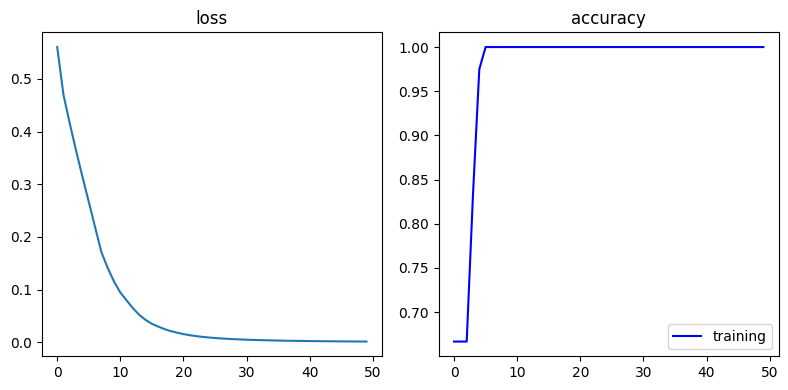

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)

plt.title("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training")
#plt.plot(model.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

dict_keys(['loss', 'accuracy'])


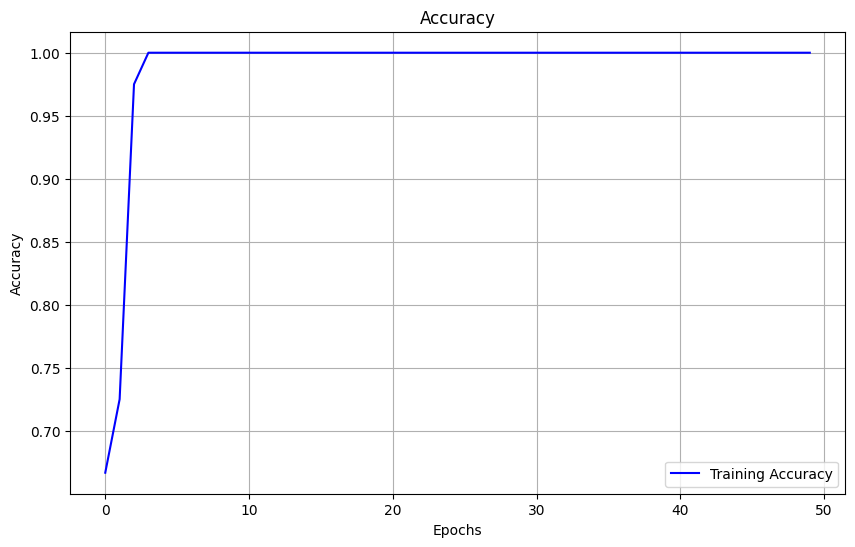

In [20]:
import matplotlib.pyplot as plt

# 훈련 과정 기록 확인
print(hist.history.keys())

# 정확도 그래프 플롯
plt.figure(figsize=(10, 6))

plt.title("Accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()


In [41]:
##과제

#데이터프레임 만들어서 찍어준다. 
#결측치는 제거한다(불필요한 것들)
#결측치가 너무 많으면 컬럼을 제거해버린다. 
#대체 가능한 것들. 가장 많이 쓰여진 것 결측치 평균 최빈 데이터들을 잘 가공시킨다. 
#범주형 컬럼처리 -get dummies 
#float로 바꿔주어야 한다. 
#x_data y_data 입력값 logistic decisiontree neural 답을 알고 답에 맞추기 위한 입력 데이터 
#결과가 없다면 labeling 작업을 해주어야 한다. 입력값 출력값을 한다.
#test data를 빼놓는 이유는 머신러닝 모델이 어느 정도 정확한지 test data 는 빼놓고 confussion_matrix를 넣고 epochs값이 몇인지 확인한다. 



##시험
#머신러닝 프로그램 출제 X  